In [1]:
import data_accessor as da
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pylab as plt
from matplotlib import cm
import matplotlib.dates as mdates
import os
import pathlib
from functools import reduce
plt.style.use(['dark_background', 'seaborn-darkgrid'])

In [2]:
data_1 = pd.read_csv("./data/Temperature_PT1000_data_Original.csv",skiprows=806,error_bad_lines=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_2 = pd.read_hdf('./data/PT1000_all_20210218.h5')

In [4]:
data_1

,#,ISO-Time,duration,TI2,TI1,TI4,TI3,TI6,TI5,TI8,...,T8,T7,T10,T9,T12,T11,T14,T13,T16,T15
0,2021-02-25,00:30:42.026,150.000,6.38,6.11,5.44,6.12,6.18,6.11,6.20,...,5.96,6.18,7.33,9.63,6.16,6.31,6.08,7.55,5.90,5.81
1,2021-02-25,00:33:42.026,330.000,6.38,6.12,5.45,6.13,6.18,6.11,6.20,...,5.96,6.18,7.33,9.61,6.16,6.31,6.08,7.55,5.90,5.81
2,2021-02-25,00:36:42.026,510.000,6.38,6.12,5.45,6.13,6.18,6.11,6.20,...,5.96,6.18,7.34,9.60,6.16,6.31,6.08,7.54,5.90,5.81
3,2021-02-25,00:39:42.026,690.000,6.38,6.12,5.44,6.13,6.18,6.10,6.20,...,5.96,6.18,7.34,9.58,6.17,6.31,6.09,7.54,5.90,5.81
4,2021-02-25,00:42:42.026,870.000,6.38,6.12,5.45,6.13,6.18,6.10,6.20,...,5.96,6.18,7.34,9.56,6.16,6.32,6.09,7.53,5.90,5.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92795,2021-09-05,23:46:25.565,3330330.0,16.27,16.23,14.64,15.97,16.25,15.96,15.87,...,16.92,17.6,18.94,22.55,17.06,17.64,16.19,17.59,16.15,16.03
92796,2021-09-05,23:49:25.565,3330510.0,16.27,16.23,14.65,15.97,16.25,15.96,15.87,...,16.92,17.6,18.95,22.53,17.06,17.64,16.19,17.58,16.15,16.03
92797,2021-09-05,23:52:25.565,3330690.0,16.27,16.23,14.61,15.97,16.24,15.96,15.87,...,16.92,17.6,18.95,22.5,17.06,17.64,16.19,17.58,16.15,16.03
92798,2021-09-05,23:55:25.565,3330870.0,16.27,16.23,14.63,15.97,16.24,15.96,15.87,...,16.92,17.6,18.95,22.48,17.06,17.65,16.19,17.57,16.15,16.03


In [5]:
data_1['date_text'] = data_1['#'] + " " + data_1['ISO-Time']

In [6]:
filter_terms = 'Port|Bus|Baud|Timeout|List|Device|Calibration|Description|ISO-Time'
data_1 = data_1[~data_1['date_text'].str.contains(filter_terms)]

In [7]:
data_1 = data_1[~data_1['T14'].isnull()]

In [8]:
pd.to_datetime(data_1['date_text'], format='%Y-%m-%d %H:%M:%S.%f')

0       2021-02-25 00:30:42.026
1       2021-02-25 00:33:42.026
2       2021-02-25 00:36:42.026
3       2021-02-25 00:39:42.026
4       2021-02-25 00:42:42.026
                  ...          
92795   2021-09-05 23:46:25.565
92796   2021-09-05 23:49:25.565
92797   2021-09-05 23:52:25.565
92798   2021-09-05 23:55:25.565
92799   2021-09-05 23:58:25.565
Name: date_text, Length: 92134, dtype: datetime64[ns]

In [9]:
data_1['duration'] = data_1['duration'].astype(float)

In [10]:
data_2.head()

,TI2,TI1,TI4,TI3,TI6,TI5,TI8,TI7,T18,T17,...,T16,T15,Id 40 Input 9,Id 40 Input 10,Id 40 Input 11,Id 40 Input 12,Id 40 Input 13,Id 40 Input 14,Id 40 Input 15,Id 40 Input 16
datetime,,,,,,,,,,,,,,,,,,,,,
2020-08-13 13:41:51.814,19.22,18.7,24.91,19.14,19.08,18.27,18.23,19.09,18.42,18.05,...,20.67,21.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-13 13:42:23.000,19.22,18.7,24.87,19.14,19.08,18.27,18.23,19.09,18.42,18.05,...,20.67,21.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-13 13:42:53.008,19.22,18.7,24.79,19.13,19.08,18.26,18.23,19.10,18.42,18.05,...,20.68,21.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-13 13:43:23.017,19.22,18.7,24.89,19.13,19.08,18.27,18.23,19.09,18.42,18.05,...,20.67,21.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-13 13:43:53.018,19.22,18.7,24.83,19.14,19.08,18.26,18.23,19.09,18.42,18.05,...,20.67,21.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_2 = data_2.reset_index()
data_2 = data_2.rename(columns={"datetime":"date_text"})

In [13]:
frames = [data_2, data_1]

In [14]:
data_1000 = pd.concat(frames)

In [15]:
data_1000


,date_text,TI2,TI1,TI4,TI3,TI6,TI5,TI8,TI7,T18,...,Id 40 Input 12,Id 40 Input 13,Id 40 Input 14,Id 40 Input 15,Id 40 Input 16,#,ISO-Time,duration,TBox,TOK
0,2020-08-13 13:41:51.814000,19.22,18.7,24.91,19.14,19.08,18.27,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-13 13:42:23,19.22,18.7,24.87,19.14,19.08,18.27,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-13 13:42:53.008000,19.22,18.7,24.79,19.13,19.08,18.26,18.23,19.1,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-13 13:43:23.017000,19.22,18.7,24.89,19.13,19.08,18.27,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-13 13:43:53.018000,19.22,18.7,24.83,19.14,19.08,18.26,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92795,2021-09-05 23:46:25.565,16.27,16.23,14.64,15.97,16.25,15.96,15.87,16.2,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:46:25.565,3330330.0,15.68,12.59
92796,2021-09-05 23:49:25.565,16.27,16.23,14.65,15.97,16.25,15.96,15.87,16.2,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:49:25.565,3330510.0,15.67,12.52
92797,2021-09-05 23:52:25.565,16.27,16.23,14.61,15.97,16.24,15.96,15.87,16.19,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:52:25.565,3330690.0,15.67,12.46
92798,2021-09-05 23:55:25.565,16.27,16.23,14.63,15.97,16.24,15.96,15.87,16.2,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:55:25.565,3330870.0,15.66,12.4


In [16]:
len(data_1)

92134

In [17]:
import h5py
data_1000.to_hdf('C:/Users/Sethu/Documents/_Coderepo/rbsTrench/data/created.h5','str', mode='w')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2606: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['date_text', 'TI2', 'TI1', 'TI4', 'TI3', 'TI6', 'TI5', 'TI8', 'TI7',
       'T18', 'T17', 'T20', 'T19', 'T22', 'T21', 'T24', 'T23', 'T26', 'T25',
       'T28', 'T27', 'T30', 'T29', 'T32', 'T31', 'T2', 'T1', 'T4', 'T3', 'T6',
       'T5', 'T8', 'T7', 'T10', 'T9', 'T12', 'T11', 'T14', 'T13', 'T16', 'T15',
       'Id 40 Input 11', 'Id 40 Input 12', 'Id 40 Input 13', 'Id 40 Input 14',
       'Id 40 Input 15', 'Id 40 Input 16', '#', 'ISO-Time', 'TBox', 'TOK'],
      dtype='object')]

  pytables.to_hdf(


In [18]:
saved_h5_df = pd.read_hdf("C:/Users/Sethu/Documents/_Coderepo/rbsTrench/data/created.h5")

saved_h5_df


,date_text,TI2,TI1,TI4,TI3,TI6,TI5,TI8,TI7,T18,...,Id 40 Input 12,Id 40 Input 13,Id 40 Input 14,Id 40 Input 15,Id 40 Input 16,#,ISO-Time,duration,TBox,TOK
0,2020-08-13 13:41:51.814,19.22,18.7,24.91,19.14,19.08,18.27,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-13 13:42:23.000,19.22,18.7,24.87,19.14,19.08,18.27,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-13 13:42:53.008,19.22,18.7,24.79,19.13,19.08,18.26,18.23,19.1,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-08-13 13:43:23.017,19.22,18.7,24.89,19.13,19.08,18.27,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-08-13 13:43:53.018,19.22,18.7,24.83,19.14,19.08,18.26,18.23,19.09,18.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92795,2021-09-05 23:46:25.565,16.27,16.23,14.64,15.97,16.25,15.96,15.87,16.2,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:46:25.565,3330330.0,15.68,12.59
92796,2021-09-05 23:49:25.565,16.27,16.23,14.65,15.97,16.25,15.96,15.87,16.2,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:49:25.565,3330510.0,15.67,12.52
92797,2021-09-05 23:52:25.565,16.27,16.23,14.61,15.97,16.24,15.96,15.87,16.19,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:52:25.565,3330690.0,15.67,12.46
92798,2021-09-05 23:55:25.565,16.27,16.23,14.63,15.97,16.24,15.96,15.87,16.2,16.16,...,inf,inf,inf,inf,inf,2021-09-05,23:55:25.565,3330870.0,15.66,12.4


54


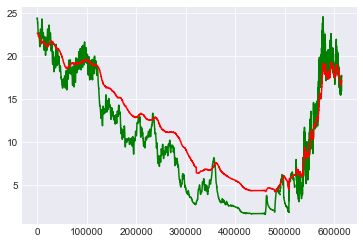

In [19]:
data_1000 = data_1000.reset_index(drop=True)
data_1000[data_1000.columns[1:48]] = data_1000.iloc[:, 1:48].astype('float')
column_length=print(len(data_1000.columns))
data_1000['TBox'] = data_1000['TBox'].astype(float)
data_1000['TOK'] = data_1000['TOK'].astype(float)
data_1000['T13'].plot(color='green')
data_1000['T12'].plot(color='red')
plt.show()


In [21]:
# convert datetime column to datetime type
data_1000['date_text'] = pd.to_datetime(data_1000['date_text'])

In [22]:

data_1000.agg(Minimum_Date=('date_text', np.min), Maximum_Date=('date_text', np.max))


,date_text
Minimum_Date,2020-08-13 13:41:51.814
Maximum_Date,2021-09-05 23:58:25.565


<AxesSubplot:>

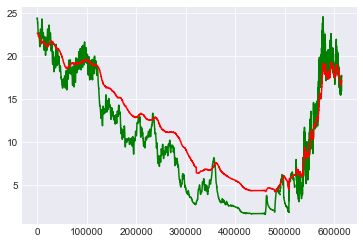

In [23]:
data_1000 = data_1000.reset_index(drop=True)

data_1000['T13'] = data_1000['T13'].astype(float)
data_1000['T12'] = data_1000['T12'].astype(float)

data_1000['T13'].plot(color='green')
data_1000['T12'].plot(color='red')


                           T17    T18    T19    T20    T21    T22    T23  \
date_text                                                                  
2020-08-13 13:41:51.814  18.05  18.42  19.87  19.48  20.01  19.93  19.13   
2020-08-13 13:42:23.000  18.05  18.42  19.87  19.48  20.01  19.93  19.13   
2020-08-13 13:42:53.008  18.05  18.42  19.87  19.48  20.01  19.93  19.13   
2020-08-13 13:43:23.017  18.05  18.42  19.87  19.48  20.01  19.93  19.13   
2020-08-13 13:43:53.018  18.05  18.42  19.87  19.48  20.01  19.93  19.13   
...                        ...    ...    ...    ...    ...    ...    ...   
2021-09-05 23:46:25.565  16.00  16.16  16.43  16.23  16.22  16.30  15.83   
2021-09-05 23:49:25.565  16.00  16.16  16.43  16.23  16.22  16.30  15.83   
2021-09-05 23:52:25.565  16.01  16.16  16.43  16.23  16.22  16.30  15.83   
2021-09-05 23:55:25.565  16.00  16.16  16.43  16.23  16.22  16.30  15.83   
2021-09-05 23:58:25.565  16.00  16.16  16.43  16.23  16.22  16.30  15.83   

           

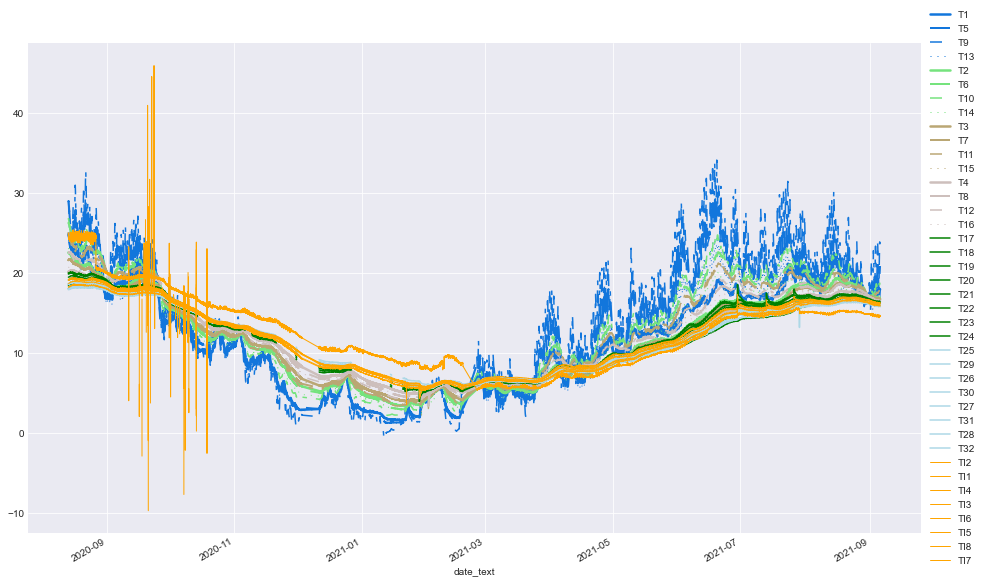

In [24]:
fname = 'box53'
time_interval_to_plot= [["2020-08-13 13:41:51.814", "2021-09-05 23:58:25.565"]]
cur_cm = cm.terrain
# linestyles = ['-', '--', '-.', ':']
linestyles = ['solid', (0, (12, 8)), (0, (8, 6, 3, 6)), (0, (1, 6))]
lineweights = [2.5, 2., 1.5 , 1.]

sensors_selected = ["T1", "T5", "T9", 'T13', "T2", "T6", "T10", 'T14', "T3", "T7", "T11", 'T15',"T4", "T8", "T12", 'T16']
sens_layer_1 = ["date_text","T1", "T5", "T9", 'T13']
sens_layer_2 = ["date_text","T2", "T6", "T10", 'T14']
sens_layer_3 = ["date_text","T3", "T7", "T11", 'T15']
sens_layer_4 = ["date_text","T4", "T8", "T12", 'T16']

sens_layer_1 = data_1000[sens_layer_1].copy()
sens_layer_1 = sens_layer_1.set_index('date_text')
sens_layer_2 = data_1000[sens_layer_2].copy()
sens_layer_2 = sens_layer_2.set_index('date_text')
sens_layer_3 = data_1000[sens_layer_3].copy()
sens_layer_3 = sens_layer_3.set_index('date_text')
sens_layer_4 = data_1000[sens_layer_4].copy()
sens_layer_4 = sens_layer_4.set_index('date_text')



sensors_sand = ["date_text", "T17", "T18", "T19", "T20", "T21", "T22", "T23", "T24"]
sensors_water = ["date_text", "T25", "T29", "T26", "T30", "T27", "T31", "T28", "T32"]
sensors_screw_in = ['date_text', 'TI2', 'TI1', 'TI4', 'TI3', 'TI6', 'TI5', 'TI8', 'TI7']


# sensors_sand = [ "T17", "T18", "T19", "T20", "T21", "T22", "T23", "T24"]
# sensors_water = ["T25", "T29", "T26", "T30", "T27", "T31", "T28", "T32"]
# sensors_screw_in = ['TI2', 'TI1', 'TI4', 'TI3', 'TI6', 'TI5', 'TI8', 'TI7']

N = 4
d = np.linspace(0.1, 0.9, N)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,10)) # 
# data of the sensors selected
data_sel = data_1000.copy() 
# data of selected sensors and time-interval
#data_sel = data_snes_sel[(data_snes_sel.index >= time_interval_to_plot[0]) & (data_snes_sel.index <= time_interval_to_plot[1])]

data_sel = data_sel.set_index('date_text')

for cur_ix, cur_sens in enumerate(sensors_selected):
    
    if cur_sens in sens_layer_1:
        cur_col = cur_cm(d[0])
    elif cur_sens in sens_layer_2:
        cur_col = cur_cm(d[1])
    elif cur_sens in sens_layer_3:
        cur_col = cur_cm(d[2])
    elif cur_sens in sens_layer_4:
        cur_col = cur_cm(d[3])
    
    data_sel[cur_sens].plot.line(ax=ax,
                                 c=cur_col,
                                 lw=lineweights[cur_ix % 4],
                                 linestyle = linestyles[cur_ix % 4])


# plotting sensors in the sand
data_sens_sand = data_1000[sensors_sand].copy()
data_sens_sand = data_sens_sand.set_index('date_text')
print(data_sens_sand)
#data_sens_sand[data_sens_sand>120]=np.nan            
data_sens_sand = data_sens_sand.clip(-1., 50.)
data_sens_sand.plot.line(ax=ax,c="green"
                        )

# plotting sensors in the water
data_sens_water = data_1000[sensors_water].copy()
data_sens_water = data_sens_water.set_index('date_text')
#data_sens_water[data_sens_water>120]=np.nan          ## TODO think if this is reasonable!!!
data_sens_water[data_sens_water<-5.0]=np.nan
data_sens_water.plot.line(ax=ax,
                         c="lightblue")

# plotting screw-in sensors
egon = data_1000[sensors_screw_in].copy()
egon = egon.set_index('date_text')
#data_screw_in[data_screw_in>30]=np.nan 
#data_screw_in[data_screw_in<7.0]=np.nan
egon.plot.line(ax=ax,
               c="orange",
                lw=1)

# ax.set(xlabel="date",
#       ylabel="temperature in the subsurface [°C]",
#       xlim=time_interval_to_plot,
#      )




plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
